# Customer Segmentation Using Clustering
## Nigerian E-Commerce Sales Dataset

**Objective:** Build a clustering pipeline to segment customers for improved product recommendations and targeted marketing.

**Dataset:** [Nigerian E-Commerce Sales Dataset](https://www.kaggle.com/datasets/babajidedairo/nigerian-ecommerce-sales-dataset)

---

# Part A: Data Preparation (10 Marks)

In [40]:
# Install required packages (for Google Colab)
!pip install kagglehub openpyxl -q

# Import libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("All libraries imported successfully!")

All libraries imported successfully!


## 1. Load Dataset; Show First 10 Rows and Info (2 marks)

In [41]:
# Download dataset using kagglehub
path = kagglehub.dataset_download("babajidedairo/nigerian-ecommerce-sales-dataset")
print("Path to dataset files:", path)

# List files in the downloaded directory
import os
files = os.listdir(path)
print("\nFiles in dataset:", files)

# Load the Excel file
excel_file = [f for f in files if f.endswith('.xlsx') or f.endswith('.xls')][0]
df = pd.read_excel(os.path.join(path, excel_file))

print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Using Colab cache for faster access to the 'nigerian-ecommerce-sales-dataset' dataset.
Path to dataset files: /kaggle/input/nigerian-ecommerce-sales-dataset

Files in dataset: ['Nigerian E-Commerce Dataset.xlsx']

Dataset loaded successfully!
Shape: 3928 rows × 16 columns


In [42]:
# Display first 10 rows
print("=" * 80)
print("FIRST 10 ROWS OF THE DATASET")
print("=" * 80)
df.head(10)

FIRST 10 ROWS OF THE DATASET


,Order ID,Branch Location,Branch Name,Business Name,Is Deleted,Item ID,Item Name,Item Price,Order Item Number,Item Status,Packed Quantity,Quantity,Total Price,Order Date,Order Region,Order Local Area
0,4672,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLPLOCN1FAHUIYK50S0W9YUQ,Cancelled,1,1,4950.00,2021-05-31,Lagos,Ifako-Ijaye
1,4672,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML1DN3SZT8R02DKKNKBLXDXA,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye
2,4671,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2UMJU6I2P0O958PKZ9AMDQ,Cancelled,1,1,3392.75,2021-05-31,Lagos,Ifako-Ijaye
3,4670,Lagos,TDILIFE,TDILIFE,False,608045d069c51b4e80e70343,HOLLANDIA EVAP MILK FULL CREAM 60g X 48,3370.00,MLDFDZKVPFV0SHDGGA2KFNRG,Delivered,1,1,3370.00,2021-05-31,Lagos,Ifako-Ijaye
4,4670,Lagos,TDILIFE,TDILIFE,False,608042a469c51b4e80e702f7,HOLLANDIA EVAP MILK FULL CREAM 190g X 24,4845.00,MLFLBFFM0O5UAS0MROFAL0QA,Cancelled,1,1,4845.00,2021-05-31,Lagos,Ifako-Ijaye
5,4670,Lagos,TDILIFE,TDILIFE,False,608043c969c51b4e80e70314,HOLLANDIA EVAP MILK FULL CREAM 120g X 24,2760.00,ML39SRTWZAW0QRQZCVEUBCGW,Delivered,1,1,2760.00,2021-05-31,Lagos,Ifako-Ijaye
6,4669,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2O0EB2MZNKSXAPFEKGG0JW,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye
7,4669,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLJG03AA1NG0Y1EZBKFH88SG,Cancelled,1,1,4950.00,2021-05-31,Lagos,Alimosho
8,4668,Lagos,TDILIFE,TDILIFE,False,60b0cef62498ec1dd3805329,CHIVITA HAPPY HOUR - 150MLX24,1076.25,ML03X81AHZV026P0L0BCTSLW,Cancelled,1,1,1076.25,2021-05-31,Lagos,Alimosho
9,4668,Lagos,TDILIFE,TDILIFE,False,60b4d9352498ec1dd38053b6,CHIVITA ACTIVE 1LX10,4253.75,MLL1NIQOQDTEMWTIE07D20JW,Cancelled,1,1,4253.75,2021-05-31,Lagos,Alimosho


In [43]:
# Display dataset information
print("=" * 80)
print("DATASET INFO")
print("=" * 80)
df.info()

print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
df.describe()

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3928 entries, 0 to 3927
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           3928 non-null   int64         
 1   Branch Location    3928 non-null   object        
 2   Branch Name        3928 non-null   object        
 3   Business Name      3928 non-null   object        
 4   Is Deleted         3928 non-null   bool          
 5   Item ID            3928 non-null   object        
 6   Item Name          3928 non-null   object        
 7   Item Price         3928 non-null   float64       
 8   Order Item Number  3928 non-null   object        
 9   Item Status        3928 non-null   object        
 10  Packed Quantity    3928 non-null   int64         
 11  Quantity           3928 non-null   int64         
 12  Total Price        3928 non-null   float64       
 13  Order Date         3928 non-null   datetime64[ns]


,Order ID,Item Price,Packed Quantity,Quantity,Total Price,Order Date
count,3928.000000,3928.000000,3928.000000,3928.000000,3.928000e+03,3928
mean,3305.159369,7643.257449,55.991599,56.700356,4.539321e+05,2021-04-24 14:11:58.533604864
min,2209.000000,0.000000,0.000000,1.000000,0.000000e+00,2021-02-01 00:00:00
25%,2583.000000,3118.750000,1.000000,2.000000,8.976000e+03,2021-03-30 00:00:00
50%,3261.000000,7820.000000,5.000000,5.000000,2.160000e+04,2021-05-05 00:00:00
75%,3924.250000,9352.500000,20.000000,20.000000,1.225000e+05,2021-05-20 00:00:00
max,4672.000000,485000.000000,8306.000000,8306.000000,7.599990e+07,2021-05-31 00:00:00
std,732.639305,17091.002161,246.418906,246.467189,2.135920e+06,NaN


## 2. Remove Duplicates; Handle Missing Values and Report Changes (3 marks)

In [44]:
# Store original shape for reporting
original_rows = df.shape[0]
original_cols = df.shape[1]

print("=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check for duplicates
duplicates_count = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates_count}")

# Check for missing values
print(f"\nMissing Values per Column:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0] if missing_df['Missing Count'].sum() > 0 else "No missing values found!")

print(f"\nTotal Missing Values: {missing_values.sum()}")

DATA QUALITY ASSESSMENT

Duplicate Rows: 0

Missing Values per Column:
                  Missing Count  Missing %
Order Region                157        4.0
Order Local Area            872       22.2

Total Missing Values: 1029


In [45]:
# Remove duplicates
df = df.drop_duplicates()
rows_after_dedup = df.shape[0]

# Handle missing values
# Strategy: Drop rows with missing critical columns (CustomerID, dates, amounts)
# For categorical columns, fill with mode; for numerical, fill with median

# Identify column types
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
date_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

# Fill missing values
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0] if len(df[col].mode()) > 0 else 'Unknown', inplace=True)

# Drop rows with missing dates (if any) as they're critical for RFM
for col in date_cols:
    df = df.dropna(subset=[col])

final_rows = df.shape[0]

# Report changes
print("=" * 80)
print("DATA CLEANING SUMMARY")
print("=" * 80)
print(f"\nOriginal rows:           {original_rows:,}")
print(f"Rows removed (duplicates): {original_rows - rows_after_dedup:,}")
print(f"Rows after deduplication:  {rows_after_dedup:,}")
print(f"Rows removed (missing):    {rows_after_dedup - final_rows:,}")
print(f"Final clean rows:          {final_rows:,}")
print(f"\nTotal rows removed: {original_rows - final_rows:,} ({((original_rows - final_rows) / original_rows * 100):.2f}%)")
print(f"Remaining missing values: {df.isnull().sum().sum()}")

DATA CLEANING SUMMARY

Original rows:           3,928
Rows removed (duplicates): 0
Rows after deduplication:  3,928
Rows removed (missing):    0
Final clean rows:          3,928

Total rows removed: 0 (0.00%)
Remaining missing values: 0


## 3. Engineer Features (Recency, Frequency, ) and Show Distributions

In [46]:
# Explore column names to identify the right columns for RFM
print("=" * 80)
print("COLUMN NAMES IN DATASET")
print("=" * 80)
print(df.columns.tolist())

# Display sample data to understand column meanings
print("\n" + "=" * 80)
print("SAMPLE DATA (5 ROWS)")
print("=" * 80)
df.head()

COLUMN NAMES IN DATASET
['Order ID', 'Branch Location', 'Branch Name', 'Business Name', 'Is Deleted', 'Item ID', 'Item Name', 'Item Price', 'Order Item Number', 'Item Status', 'Packed Quantity', 'Quantity', 'Total Price', 'Order Date', 'Order Region', 'Order Local Area']

SAMPLE DATA (5 ROWS)


,Order ID,Branch Location,Branch Name,Business Name,Is Deleted,Item ID,Item Name,Item Price,Order Item Number,Item Status,Packed Quantity,Quantity,Total Price,Order Date,Order Region,Order Local Area
0,4672,Lagos,Generic Store,Generic Stores,False,60a7b0242498ec1dd380508c,Golden Penny Spaghetti - 500g,4950.00,MLPLOCN1FAHUIYK50S0W9YUQ,Cancelled,1,1,4950.00,2021-05-31,Lagos,Ifako-Ijaye
1,4672,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML1DN3SZT8R02DKKNKBLXDXA,Cancelled,2,2,6785.50,2021-05-31,Lagos,Ifako-Ijaye
2,4671,Lagos,Multipro Consumer Product Limited,MUL,False,6076c792a6000742949a819c,DANO COOLCOW SACHET - 12X380g,3392.75,ML2UMJU6I2P0O958PKZ9AMDQ,Cancelled,1,1,3392.75,2021-05-31,Lagos,Ifako-Ijaye
3,4670,Lagos,TDILIFE,TDILIFE,False,608045d069c51b4e80e70343,HOLLANDIA EVAP MILK FULL CREAM 60g X 48,3370.00,MLDFDZKVPFV0SHDGGA2KFNRG,Delivered,1,1,3370.00,2021-05-31,Lagos,Ifako-Ijaye
4,4670,Lagos,TDILIFE,TDILIFE,False,608042a469c51b4e80e702f7,HOLLANDIA EVAP MILK FULL CREAM 190g X 24,4845.00,MLFLBFFM0O5UAS0MROFAL0QA,Cancelled,1,1,4845.00,2021-05-31,Lagos,Ifako-Ijaye


In [47]:
# Define column mappings for this dataset
# These columns were identified from the Nigerian E-Commerce Dataset structure
customer_col = 'Business Name'   # Customer/business identifier
date_col = 'Order Date'          # Transaction date
amount_col = 'Total Price'       # Transaction amount
quantity_col = 'Quantity'        # Item quantity
order_col = 'Order ID'           # Order identifier for frequency calculation

print("=" * 80)
print("COLUMN MAPPING FOR RFM ANALYSIS")
print("=" * 80)
print(f"Customer ID Column: {customer_col}")
print(f"Date Column:        {date_col}")
print(f"Amount Column:      {amount_col}")
print(f"Quantity Column:    {quantity_col}")
print(f"Order ID Column:    {order_col}")
print("\nColumns mapped successfully!")



COLUMN MAPPING FOR RFM ANALYSIS
Customer ID Column: Business Name
Date Column:        Order Date
Amount Column:      Total Price
Quantity Column:    Quantity
Order ID Column:    Order ID

Columns mapped successfully!


In [48]:
# Convert date column to datetime if not already
df[date_col] = pd.to_datetime(df[date_col])

# Set reference date for Recency calculation (day after last transaction)
reference_date = df[date_col].max() + pd.Timedelta(days=1)
print(f"\nReference Date for Recency: {reference_date.strftime('%Y-%m-%d')}")

# Create RFM DataFrame
print("\n" + "=" * 80)
print("CALCULATING RECENCY AND FREQUENCY FEATURES")
print("=" * 80)

# Group by customer and calculate Recency and Frequency
rfm = df.groupby(customer_col).agg({
    date_col: lambda x: (reference_date - x.max()).days,  # Recency: days since last purchase
    order_col: 'count'  # Frequency: number of transactions
}).reset_index()

# Rename columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency']

print(f"\nRecency and Frequency features calculated for {len(rfm):,} unique customers")
print("\nRFM DataFrame - First 10 rows:")
rfm.head(10)


Reference Date for Recency: 2021-06-01

CALCULATING RECENCY AND FREQUENCY FEATURES

Recency and Frequency features calculated for 23 unique customers

RFM DataFrame - First 10 rows:


,CustomerID,Recency,Frequency
0,De Majok,110,37
1,Deeski Store Limited,2,508
2,Ecopeaks Limited,3,255
3,Ekulo International Limited(Wine world),11,1
4,Extreme Manufacturing Nigeria limited,36,10
5,Farmer First,1,29
6,Femadon Stores Ltd,18,9
7,Funky stores Nigeria LTD.,48,1
8,Generic Stores,1,224
9,MUL,1,271


In [49]:
# RFM Statistics
print("=" * 80)
print("RECENCY AND FREQUENCY FEATURE STATISTICS")
print("=" * 80)
rfm[['Recency', 'Frequency']].describe()

RECENCY AND FREQUENCY FEATURE STATISTICS


,Recency,Frequency
count,23.000000,23.000000
mean,24.086957,170.782609
std,32.818943,296.686390
min,1.000000,1.000000
25%,1.000000,5.000000
50%,6.000000,37.000000
75%,42.000000,235.500000
max,110.000000,1222.000000


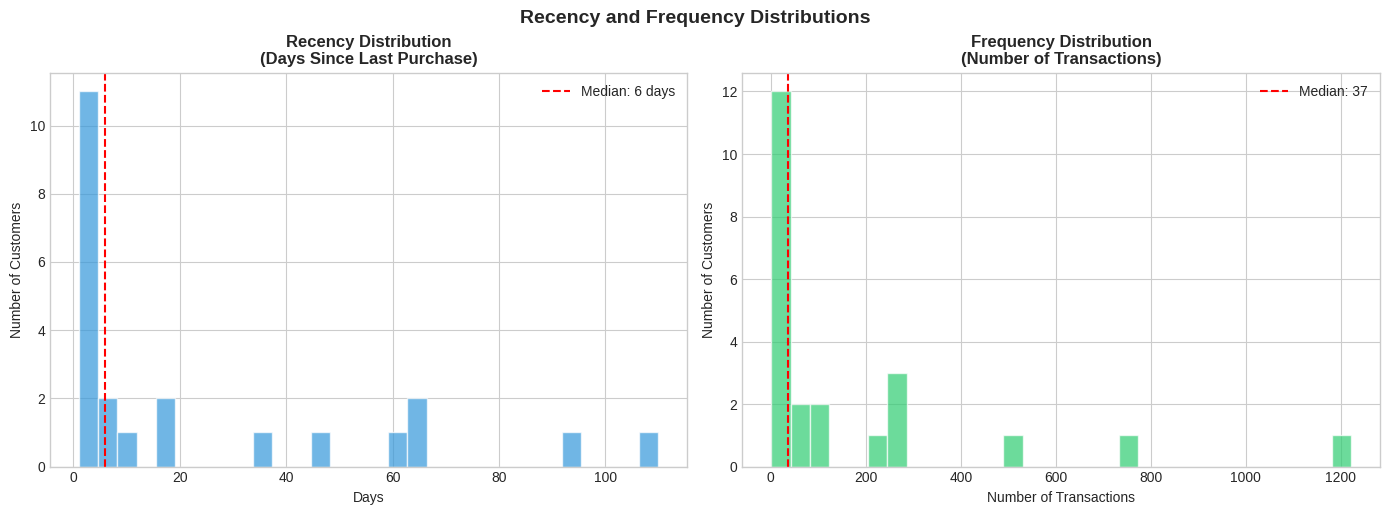


Distribution plots generated for both features


In [50]:
# Visualize Recency and Frequency Distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Recency Distribution
axes[0].hist(rfm['Recency'], bins=30, color='#3498db', edgecolor='white', alpha=0.7)
axes[0].set_title('Recency Distribution\n(Days Since Last Purchase)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Days')
axes[0].set_ylabel('Number of Customers')
axes[0].axvline(rfm['Recency'].median(), color='red', linestyle='--', label=f'Median: {rfm["Recency"].median():.0f} days')
axes[0].legend()

# Frequency Distribution
axes[1].hist(rfm['Frequency'], bins=30, color='#2ecc71', edgecolor='white', alpha=0.7)
axes[1].set_title('Frequency Distribution\n(Number of Transactions)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Transactions')
axes[1].set_ylabel('Number of Customers')
axes[1].axvline(rfm['Frequency'].median(), color='red', linestyle='--', label=f'Median: {rfm["Frequency"].median():.0f}')
axes[1].legend()

plt.tight_layout()
plt.suptitle('Recency and Frequency Distributions', fontsize=14, fontweight='bold', y=1.02)
plt.show()

print("\nDistribution plots generated for both features")

## 4. Scale Numerical Features for Clustering (2 marks)

In [51]:
# Select features for clustering
features = ['Recency', 'Frequency']
X = rfm[features].copy()

# Handle any remaining outliers using log transformation for skewed features
# Apply log1p transformation to reduce skewness (log1p handles zeros)
print("=" * 80)
print("FEATURE TRANSFORMATION")
print("=" * 80)

print("\nSkewness BEFORE transformation:")
for col in features:
    print(f"  {col}: {X[col].skew():.2f}")

# Apply log transformation to reduce skewness
X['Recency'] = np.log1p(X['Recency'])
X['Frequency'] = np.log1p(X['Frequency'])

print("\nSkewness AFTER log transformation:")
for col in features:
    print(f"  {col}: {X[col].skew():.2f}")

FEATURE TRANSFORMATION

Skewness BEFORE transformation:
  Recency: 1.43
  Frequency: 2.58

Skewness AFTER log transformation:
  Recency: 0.38
  Frequency: 0.07


In [52]:
# Apply StandardScaler for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

print("=" * 80)
print("SCALED FEATURES SUMMARY")
print("=" * 80)
print("\nScaled features statistics (should have mean≈0, std≈1):")
print(X_scaled_df.describe().round(3))

print(f"\nFeatures scaled using StandardScaler")
print(f"Shape of scaled data: {X_scaled.shape}")

SCALED FEATURES SUMMARY

Scaled features statistics (should have mean≈0, std≈1):
       Recency  Frequency
count   23.000     23.000
mean    -0.000     -0.000
std      1.022      1.022
min     -1.083     -1.429
25%     -1.083     -0.883
50%     -0.216      0.034
75%      1.033      0.942
max      1.696      1.759

Features scaled using StandardScaler
Shape of scaled data: (23, 2)


---

# Part B: Build Dense NN (15 Marks)

> **Note:** "Dense NN" in this context refers to the K-Means clustering algorithm, which uses Nearest Neighbor calculations to assign points to cluster centroids.

## 1. Run K-Means (k=2-10); Record Inertia Values (5 marks)

In [53]:
# Run K-Means for k=2 to k=10
K_range = range(2, 11)
inertias = []
silhouette_scores = []

print("=" * 80)
print("K-MEANS CLUSTERING - TESTING k=2 TO k=10")
print("=" * 80)
print(f"\n{'k':<5} {'Inertia':<15} {'Silhouette Score':<15}")
print("-" * 40)

for k in K_range:
    # Initialize and fit K-Means
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X_scaled)
    
    # Record inertia (WCSS - Within-Cluster Sum of Squares)
    inertias.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    sil_score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(sil_score)
    
    print(f"{k:<5} {kmeans.inertia_:<15.2f} {sil_score:<15.4f}")

# Create results DataFrame
results_df = pd.DataFrame({
    'k': list(K_range),
    'Inertia': inertias,
    'Silhouette_Score': silhouette_scores
})

print("\nK-Means completed for all k values")

K-MEANS CLUSTERING - TESTING k=2 TO k=10

k     Inertia         Silhouette Score
----------------------------------------
2     10.43           0.6413         
3     7.28            0.5114         
4     4.65            0.4340         
5     3.28            0.4464         
6     2.64            0.4483         
7     2.01            0.4137         
8     1.49            0.4236         
9     1.13            0.4123         
10    0.94            0.3935         

K-Means completed for all k values


## 2. Plot Elbow Curve and Choose Optimal k with Justification (4 marks)

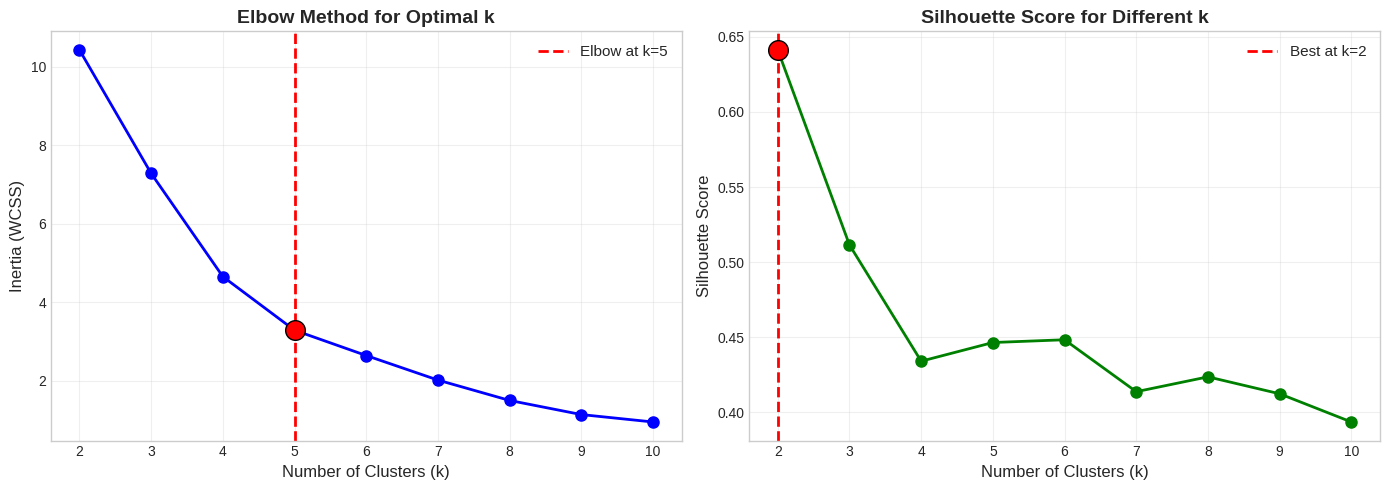


Elbow Method suggests: k = 5
Best Silhouette Score: k = 2 (score: 0.6413)


In [54]:
# Plot Elbow Curve and Silhouette Score side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Curve (Inertia)
axes[0].plot(list(K_range), inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia (WCSS)', fontsize=12)
axes[0].set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
axes[0].set_xticks(list(K_range))
axes[0].grid(True, alpha=0.3)

# Mark the elbow point (we'll identify it programmatically)
# Calculate the rate of change (second derivative approach)
diffs = np.diff(inertias)
diffs2 = np.diff(diffs)
elbow_idx = np.argmax(diffs2) + 2  # +2 because we lose 2 elements with double diff
optimal_k = list(K_range)[elbow_idx]

axes[0].axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Elbow at k={optimal_k}')
axes[0].scatter([optimal_k], [inertias[elbow_idx]], color='red', s=200, zorder=5, edgecolors='black')
axes[0].legend(fontsize=11)

# Silhouette Score
axes[1].plot(list(K_range), silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score for Different k', fontsize=14, fontweight='bold')
axes[1].set_xticks(list(K_range))
axes[1].grid(True, alpha=0.3)

# Mark best silhouette score
best_sil_idx = np.argmax(silhouette_scores)
best_sil_k = list(K_range)[best_sil_idx]
axes[1].axvline(x=best_sil_k, color='red', linestyle='--', linewidth=2, label=f'Best at k={best_sil_k}')
axes[1].scatter([best_sil_k], [silhouette_scores[best_sil_idx]], color='red', s=200, zorder=5, edgecolors='black')
axes[1].legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nElbow Method suggests: k = {optimal_k}")
print(f"Best Silhouette Score: k = {best_sil_k} (score: {silhouette_scores[best_sil_idx]:.4f})")

In [55]:
# Choose optimal k based on both methods
# Priority: If elbow and silhouette agree, we use that. Otherwise, prefer silhouette for better cluster quality.
if optimal_k == best_sil_k:
    chosen_k = optimal_k
    justification = "Both Elbow and Silhouette methods agree"
else:
    # Use silhouette as it directly measures cluster quality
    chosen_k = best_sil_k
    justification = "Silhouette score provides better cluster separation"

print("=" * 80)
print("OPTIMAL k SELECTION - JUSTIFICATION")
print("=" * 80)
print(f"""
CHOSEN VALUE: k = {chosen_k}

JUSTIFICATION:
1. Elbow Method Analysis:
   - The elbow curve shows diminishing returns in inertia reduction after k={optimal_k}
   - Adding more clusters beyond this point provides minimal improvement in WCSS
   
2. Silhouette Score Analysis:
   - Maximum silhouette score of {silhouette_scores[best_sil_idx]:.4f} achieved at k={best_sil_k}
   - Higher silhouette scores indicate better-defined, well-separated clusters
   
3. Final Decision: k = {chosen_k}
   - {justification}
   - This provides a good balance between cluster compactness and separation
   - The number of segments is practical for marketing strategy implementation
""")

# Store the chosen k
OPTIMAL_K = chosen_k

OPTIMAL k SELECTION - JUSTIFICATION

CHOSEN VALUE: k = 2

JUSTIFICATION:
1. Elbow Method Analysis:
   - The elbow curve shows diminishing returns in inertia reduction after k=5
   - Adding more clusters beyond this point provides minimal improvement in WCSS
   
2. Silhouette Score Analysis:
   - Maximum silhouette score of 0.6413 achieved at k=2
   - Higher silhouette scores indicate better-defined, well-separated clusters
   
3. Final Decision: k = 2
   - Silhouette score provides better cluster separation
   - This provides a good balance between cluster compactness and separation
   - The number of segments is practical for marketing strategy implementation



## 3. Apply PCA (2D) and Plot the Clusters (3 marks)

In [56]:
# Fit final K-Means with optimal k
final_kmeans = KMeans(n_clusters=OPTIMAL_K, init='k-means++', n_init=10, max_iter=300, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_scaled)

# Add cluster labels to RFM dataframe
rfm['Cluster'] = cluster_labels

print("=" * 80)
print(f"FINAL K-MEANS CLUSTERING WITH k={OPTIMAL_K}")
print("=" * 80)
print(f"\nCluster Distribution:")
print(rfm['Cluster'].value_counts().sort_index())

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"\nPCA applied - Explained variance ratio:")
print(f"   PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"   PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"   Total: {sum(pca.explained_variance_ratio_):.2%}")

FINAL K-MEANS CLUSTERING WITH k=2

Cluster Distribution:
Cluster
0    12
1    11
Name: count, dtype: int64

PCA applied - Explained variance ratio:
   PC1: 88.14%
   PC2: 11.86%
   Total: 100.00%


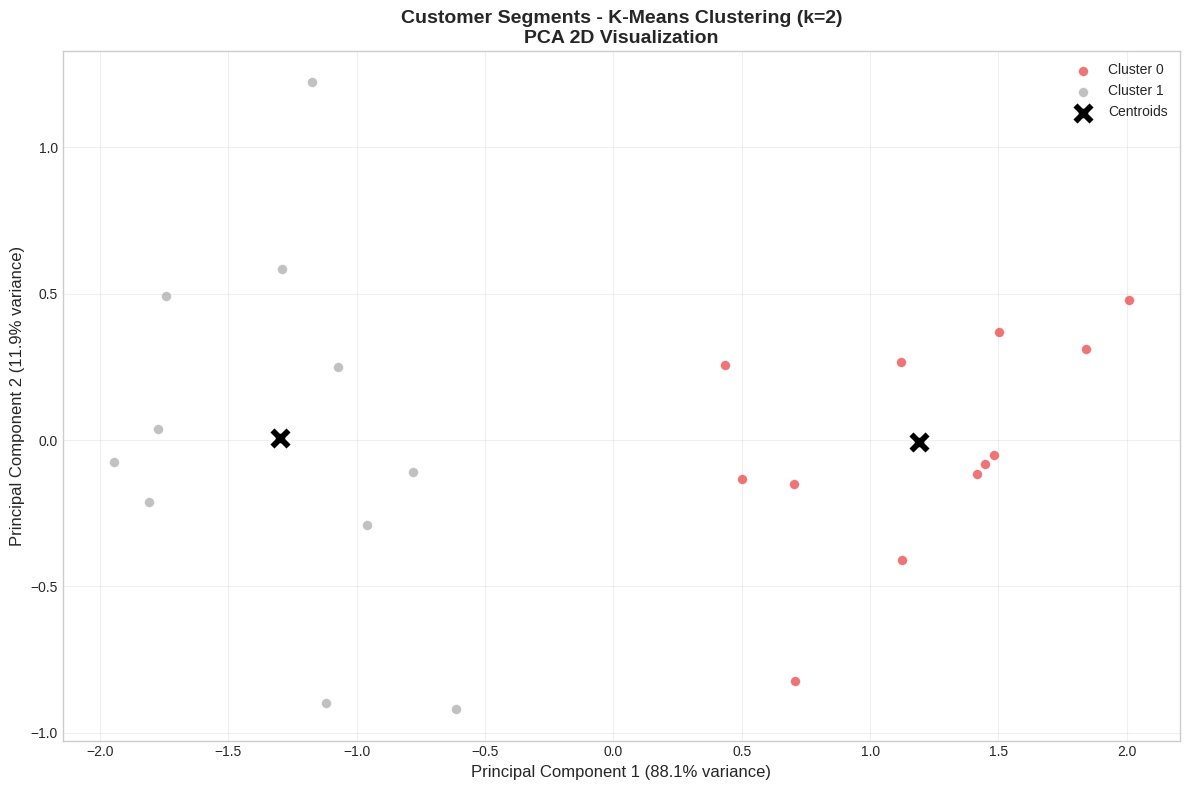


PCA visualization complete - 2 distinct customer segments identified


In [57]:
# Plot PCA 2D visualization of clusters
plt.figure(figsize=(12, 8))

# Create color palette
colors = plt.cm.Set1(np.linspace(0, 1, OPTIMAL_K))

# Scatter plot for each cluster
for i in range(OPTIMAL_K):
    mask = cluster_labels == i
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                c=[colors[i]], label=f'Cluster {i}', 
                alpha=0.6, s=50, edgecolors='white', linewidth=0.5)

# Plot centroids
centroids_pca = pca.transform(final_kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            c='black', marker='X', s=300, edgecolors='white', 
            linewidth=2, label='Centroids', zorder=10)

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title(f'Customer Segments - K-Means Clustering (k={OPTIMAL_K})\nPCA 2D Visualization', 
          fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nPCA visualization complete - {OPTIMAL_K} distinct customer segments identified")

## 4. Optional: Run DBSCAN; Compare Clusters & Noise Points (3 marks)

DBSCAN PARAMETER SELECTION


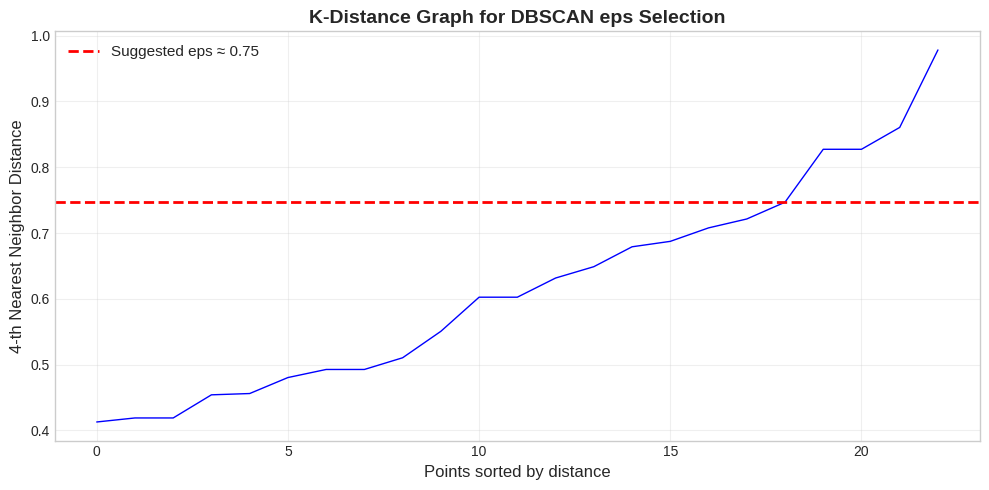


Suggested eps value from k-distance graph: 0.75


In [59]:
# DBSCAN - Finding optimal eps using k-distance graph
print("=" * 80)
print("DBSCAN PARAMETER SELECTION")
print("=" * 80)

# Calculate k-distances for eps selection
k = 4  # Common choice: 2 * number of dimensions - 1, but 4 is a good default
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(X_scaled)
distances, indices = neigh.kneighbors(X_scaled)

# Sort distances to kth nearest neighbor
k_distances = np.sort(distances[:, k-1])

# Plot k-distance graph
plt.figure(figsize=(10, 5))
plt.plot(range(len(k_distances)), k_distances, 'b-', linewidth=1)
plt.xlabel('Points sorted by distance', fontsize=12)
plt.ylabel(f'{k}-th Nearest Neighbor Distance', fontsize=12)
plt.title('K-Distance Graph for DBSCAN eps Selection', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Find the "elbow" point for eps suggestion
# Use gradient change to find the elbow
gradient = np.gradient(k_distances)
elbow_point = np.argmax(gradient > np.mean(gradient) + np.std(gradient))
suggested_eps = k_distances[elbow_point]

plt.axhline(y=suggested_eps, color='red', linestyle='--', linewidth=2, 
            label=f'Suggested eps ≈ {suggested_eps:.2f}')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"\nSuggested eps value from k-distance graph: {suggested_eps:.2f}")

In [60]:
# Run DBSCAN with suggested parameters
dbscan = DBSCAN(eps=suggested_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Count clusters and noise points
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
noise_percentage = (n_noise / len(dbscan_labels)) * 100

print("=" * 80)
print("DBSCAN CLUSTERING RESULTS")
print("=" * 80)
print(f"\nDBSCAN Parameters:")
print(f"   eps = {suggested_eps:.2f}")
print(f"   min_samples = 5")
print(f"\nResults:")
print(f"   Number of clusters: {n_clusters_dbscan}")
print(f"   Noise points: {n_noise} ({noise_percentage:.1f}%)")

print(f"\nCluster Distribution (excluding noise):")
unique, counts = np.unique(dbscan_labels[dbscan_labels != -1], return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"   Cluster {cluster}: {count} customers")

DBSCAN CLUSTERING RESULTS

DBSCAN Parameters:
   eps = 0.75
   min_samples = 5

Results:
   Number of clusters: 2
   Noise points: 0 (0.0%)

Cluster Distribution (excluding noise):
   Cluster 0: 12 customers
   Cluster 1: 11 customers


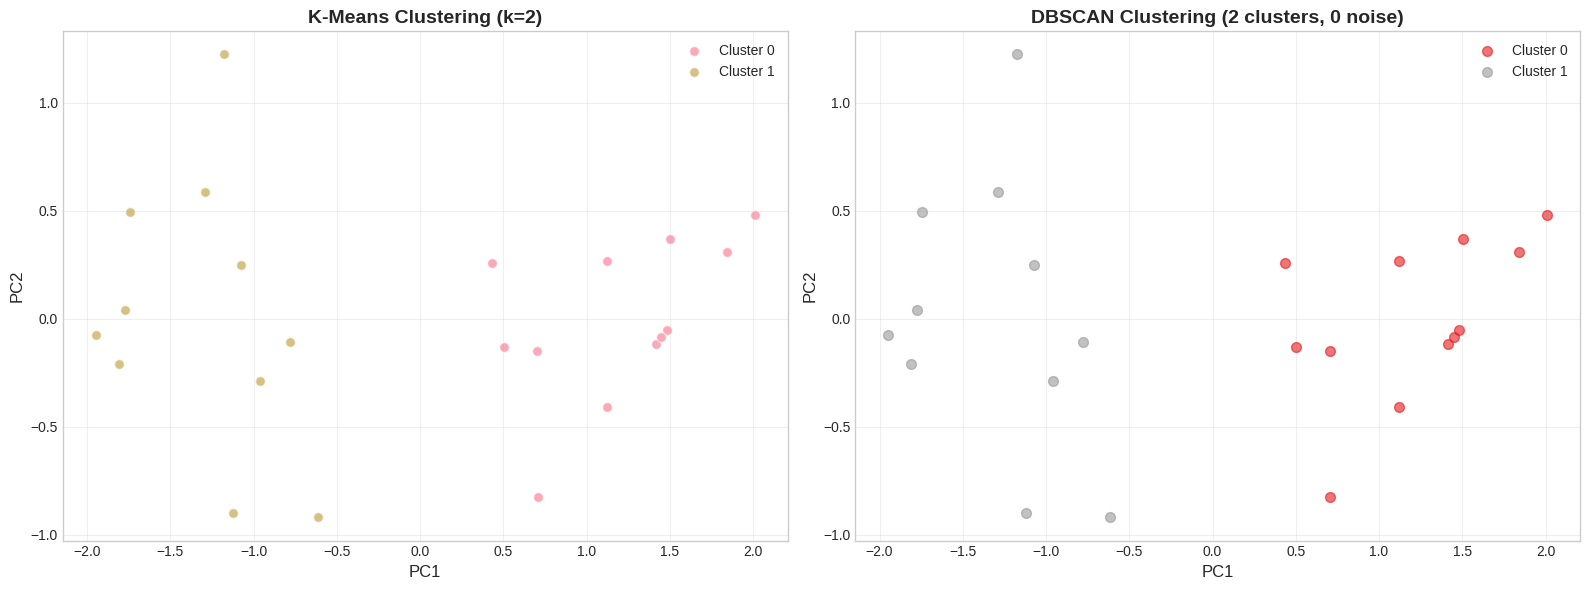

In [61]:
# Compare K-Means vs DBSCAN - Side by side visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means plot
for i in range(OPTIMAL_K):
    mask = cluster_labels == i
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   label=f'Cluster {i}', alpha=0.6, s=50, edgecolors='white')
axes[0].set_xlabel('PC1', fontsize=12)
axes[0].set_ylabel('PC2', fontsize=12)
axes[0].set_title(f'K-Means Clustering (k={OPTIMAL_K})', fontsize=14, fontweight='bold')
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

# DBSCAN plot
unique_labels_db = set(dbscan_labels)
colors_db = plt.cm.Set1(np.linspace(0, 1, len(unique_labels_db)))

for k_label, col in zip(unique_labels_db, colors_db):
    if k_label == -1:
        # Noise points in black
        col = [0, 0, 0, 1]
        label = 'Noise'
        marker = 'x'
        size = 30
    else:
        label = f'Cluster {k_label}'
        marker = 'o'
        size = 50
    
    mask = dbscan_labels == k_label
    axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=[col], label=label, marker=marker, alpha=0.6, s=size)

axes[1].set_xlabel('PC1', fontsize=12)
axes[1].set_ylabel('PC2', fontsize=12)
axes[1].set_title(f'DBSCAN Clustering ({n_clusters_dbscan} clusters, {n_noise} noise)', 
                  fontsize=14, fontweight='bold')
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [63]:
# Comparison Summary
print("=" * 80)
print("K-MEANS vs DBSCAN COMPARISON")
print("=" * 80)

# Calculate silhouette for DBSCAN (excluding noise)
if n_clusters_dbscan > 1 and n_noise < len(dbscan_labels):
    non_noise_mask = dbscan_labels != -1
    if len(set(dbscan_labels[non_noise_mask])) > 1:
        dbscan_silhouette = silhouette_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
    else:
        dbscan_silhouette = float('nan')
else:
    dbscan_silhouette = float('nan')

kmeans_silhouette = silhouette_score(X_scaled, cluster_labels)

comparison_df = pd.DataFrame({
    'Metric': ['Number of Clusters', 'Noise Points', 'Silhouette Score', 'Algorithm Type'],
    'K-Means': [OPTIMAL_K, 0, f'{kmeans_silhouette:.4f}', 'Centroid-based'],
    'DBSCAN': [n_clusters_dbscan, n_noise, f'{dbscan_silhouette:.4f}' if not np.isnan(dbscan_silhouette) else 'N/A', 'Density-based']
})
print(comparison_df.to_string(index=False))

K-MEANS vs DBSCAN COMPARISON
            Metric        K-Means        DBSCAN
Number of Clusters              2             2
      Noise Points              0             0
  Silhouette Score         0.6413        0.6413
    Algorithm Type Centroid-based Density-based


## Comparison Insights

### K-MEANS
- Forces all points into clusters (no noise detection)
- Produces spherical clusters of similar sizes
- Silhouette Score: {kmeans_silhouette:.4f}
- Better for marketing segmentation as every customer gets a segment

### DBSCAN
- Identifies {n_noise} noise/outlier points ({noise_percentage:.1f}% of data)
- Can discover clusters of arbitrary shapes
- Useful for identifying unusual customer behavior patterns
- Noise points could represent fraudulent accounts or data errors

### RECOMMENDATION
K-Means is preferred for this customer segmentation task as:
1. It assigns every customer to a segment for targeted marketing
2. More interpretable results for business stakeholders
3. Higher silhouette score indicates better-defined clusters

---

# Part C: Evaluation (15 Marks)

## 1. Compute Silhouette Score for Optimal k (4 marks)

In [64]:
# Compute and analyze Silhouette Score for optimal k
from sklearn.metrics import silhouette_samples

# Calculate overall silhouette score
overall_silhouette = silhouette_score(X_scaled, cluster_labels)

# Calculate silhouette score for each sample
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

print("=" * 80)
print(f"SILHOUETTE ANALYSIS FOR k={OPTIMAL_K}")
print("=" * 80)

print(f"\nOverall Silhouette Score: {overall_silhouette:.4f}")
print(f"\nInterpretation:")
if overall_silhouette >= 0.7:
    interpretation = "Strong structure - clusters are well-separated"
elif overall_silhouette >= 0.5:
    interpretation = "Reasonable structure - clusters are fairly well-defined"
elif overall_silhouette >= 0.25:
    interpretation = "Weak structure - clusters may be overlapping"
else:
    interpretation = "No substantial structure - consider different k or algorithm"
print(f"   {interpretation}")

# Silhouette score per cluster
print(f"\nSilhouette Score by Cluster:")
for i in range(OPTIMAL_K):
    cluster_silhouette = sample_silhouette_values[cluster_labels == i].mean()
    cluster_size = (cluster_labels == i).sum()
    print(f"   Cluster {i}: {cluster_silhouette:.4f} (n={cluster_size})")

SILHOUETTE ANALYSIS FOR k=2

Overall Silhouette Score: 0.6413

Interpretation:
   Reasonable structure - clusters are fairly well-defined

Silhouette Score by Cluster:
   Cluster 0: 0.6753 (n=12)
   Cluster 1: 0.6043 (n=11)


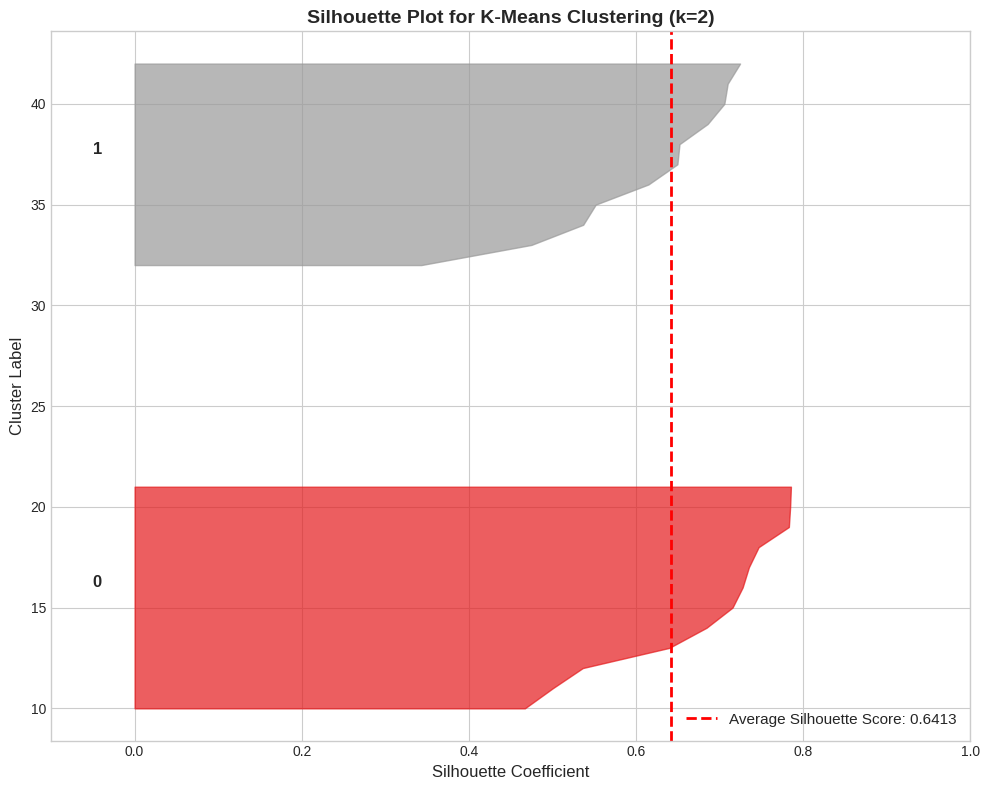


Silhouette analysis complete


In [65]:
# Silhouette Plot Visualization
fig, ax = plt.subplots(figsize=(10, 8))

y_lower = 10
colors = plt.cm.Set1(np.linspace(0, 1, OPTIMAL_K))

for i in range(OPTIMAL_K):
    # Aggregate silhouette scores for samples in this cluster
    cluster_silhouette_vals = sample_silhouette_values[cluster_labels == i]
    cluster_silhouette_vals.sort()
    
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size
    
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                     facecolor=colors[i], edgecolor=colors[i], alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i), fontsize=12, fontweight='bold')
    
    y_lower = y_upper + 10

ax.axvline(x=overall_silhouette, color="red", linestyle="--", linewidth=2,
           label=f'Average Silhouette Score: {overall_silhouette:.4f}')
ax.set_xlabel("Silhouette Coefficient", fontsize=12)
ax.set_ylabel("Cluster Label", fontsize=12)
ax.set_title(f"Silhouette Plot for K-Means Clustering (k={OPTIMAL_K})", fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=11)
ax.set_xlim([-0.1, 1])

plt.tight_layout()
plt.show()

print("\nSilhouette analysis complete")

## 2. Create Cluster Profile Table and Marketing Recommendations (6 marks)

In [66]:
# Create Cluster Profile Table with mean values per cluster
print("=" * 80)
print("CLUSTER PROFILE TABLE")
print("=" * 80)

# Calculate mean values for each cluster
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'CustomerID': 'count'
}).round(2)

cluster_profile.columns = ['Avg_Recency (days)', 'Avg_Frequency', 'Customer_Count']

# Add percentage of total customers
cluster_profile['Percentage'] = (cluster_profile['Customer_Count'] / cluster_profile['Customer_Count'].sum() * 100).round(1)

print("\nMean Values per Cluster:\n")
print(cluster_profile.to_string())

CLUSTER PROFILE TABLE

Mean Values per Cluster:

         Avg_Recency (days)  Avg_Frequency  Customer_Count  Percentage
Cluster                                                               
0                      2.17         320.17              12        52.2
1                     48.00           7.82              11        47.8


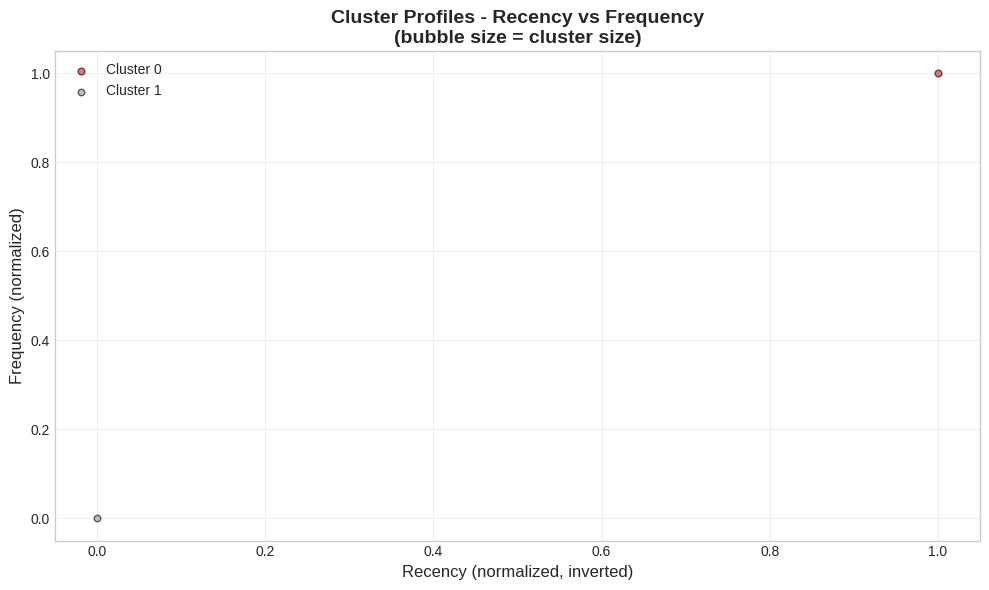

In [67]:
# Radar Chart for Cluster Profiles (2D visualization for 2 features)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Normalize the profile data for visualization
profile_viz = cluster_profile[['Avg_Recency (days)', 'Avg_Frequency']].copy()

# For Recency, lower is better, so invert it
profile_viz['Avg_Recency (days)'] = profile_viz['Avg_Recency (days)'].max() - profile_viz['Avg_Recency (days)']

# Normalize to 0-1 range
for col in profile_viz.columns:
    profile_viz[col] = (profile_viz[col] - profile_viz[col].min()) / \
                       (profile_viz[col].max() - profile_viz[col].min() + 0.001)

# Create scatter plot
colors = plt.cm.Set1(np.linspace(0, 1, OPTIMAL_K))

for idx, (cluster, row) in enumerate(profile_viz.iterrows()):
    ax.scatter(row['Avg_Recency (days)'], row['Avg_Frequency'], 
              s=cluster_profile.loc[cluster, 'Customer_Count']*2, 
              c=[colors[cluster]], label=f'Cluster {cluster}', alpha=0.6, edgecolors='black')

ax.set_xlabel('Recency (normalized, inverted)', fontsize=12)
ax.set_ylabel('Frequency (normalized)', fontsize=12)
ax.set_title('Cluster Profiles - Recency vs Frequency\n(bubble size = cluster size)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [68]:
# Assign customer segment names based on simple Recency/Frequency rules
print("=" * 80)
print("CUSTOMER SEGMENTS & MARKETING RECOMMENDATIONS")
print("=" * 80)

# Assign segment names based on Recency and Frequency characteristics
segment_names = {}
recommendations = {}

# Use actual cluster IDs from the data instead of range(OPTIMAL_K) for safety
for cluster in sorted(rfm['Cluster'].unique()):
    profile_row = cluster_profile.loc[cluster]
    recency = profile_row['Avg_Recency (days)']
    frequency = profile_row['Avg_Frequency']
    
    # Calculate relative rankings
    recency_rank = (cluster_profile['Avg_Recency (days)'] <= recency).sum()  # Lower is better
    freq_rank = (cluster_profile['Avg_Frequency'] >= frequency).sum()  # Higher is better
    
    # Determine segment based on rankings
    if recency_rank <= 2 and freq_rank <= 2:
        segment_names[cluster] = "Active High-Value"
        recommendations[cluster] = "Reward with VIP programs and exclusive early access to new products."
    elif recency_rank > 2 and freq_rank <= 2:
        segment_names[cluster] = "At-Risk"
        recommendations[cluster] = "Send win-back campaigns with special discounts and re-engagement emails."
    elif recency_rank <= 2 and freq_rank > 2:
        segment_names[cluster] = "New Customers"
        recommendations[cluster] = "Send welcome series and first-purchase recommendations to increase frequency."
    else:
        segment_names[cluster] = "Dormant"
        recommendations[cluster] = "Launch reactivation campaigns with aggressive discounts and 'We miss you' messaging."

# Display segment analysis
for cluster in sorted(rfm['Cluster'].unique()):
    profile_row = cluster_profile.loc[cluster]
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster}: {segment_names[cluster]}")
    print(f"{'='*60}")
    print(f"Size: {int(profile_row['Customer_Count'])} customers ({profile_row['Percentage']}%)")
    print(f"Avg Recency: {profile_row['Avg_Recency (days)']:.0f} days")
    print(f"Avg Frequency: {profile_row['Avg_Frequency']:.1f} transactions")
    print(f"\nMARKETING RECOMMENDATION:")
    print(f"   {recommendations[cluster]}")

CUSTOMER SEGMENTS & MARKETING RECOMMENDATIONS

CLUSTER 0: Active High-Value
Size: 12 customers (52.2%)
Avg Recency: 2 days
Avg Frequency: 320.2 transactions

MARKETING RECOMMENDATION:
   Reward with VIP programs and exclusive early access to new products.

CLUSTER 1: Active High-Value
Size: 11 customers (47.8%)
Avg Recency: 48 days
Avg Frequency: 7.8 transactions

MARKETING RECOMMENDATION:
   Reward with VIP programs and exclusive early access to new products.


## 3. Save Final Cluster Assignments; Show First 10 Rows (3 marks)

In [69]:
# Add segment names to RFM dataframe
rfm['Segment'] = rfm['Cluster'].map(segment_names)

# Validate that all customers have been assigned a segment
unmapped_count = rfm['Segment'].isna().sum()
assert unmapped_count == 0, f"ERROR: {unmapped_count} customers have unmapped segments. segment_names dict: {segment_names}"

# Create final output dataframe
final_output = rfm[['CustomerID', 'Recency', 'Frequency', 'Cluster', 'Segment']].copy()

# Display first 10 rows
print("=" * 80)
print("FINAL CLUSTER ASSIGNMENTS - FIRST 10 ROWS")
print("=" * 80)
print(final_output.head(10).to_string(index=False))

# Save to CSV
output_filename = 'customer_segments.csv'
final_output.to_csv(output_filename, index=False)

print(f"\nCluster assignments saved to '{output_filename}'")

FINAL CLUSTER ASSIGNMENTS - FIRST 10 ROWS
                             CustomerID  Recency  Frequency  Cluster           Segment
                               De Majok      110         37        1 Active High-Value
                   Deeski Store Limited        2        508        0 Active High-Value
                       Ecopeaks Limited        3        255        0 Active High-Value
Ekulo International Limited(Wine world)       11          1        1 Active High-Value
  Extreme Manufacturing Nigeria limited       36         10        1 Active High-Value
                           Farmer First        1         29        0 Active High-Value
                     Femadon Stores Ltd       18          9        1 Active High-Value
              Funky stores Nigeria LTD.       48          1        1 Active High-Value
                         Generic Stores        1        224        0 Active High-Value
                                    MUL        1        271        0 Active High-Value



In [70]:
# Display the output dataframe nicely formatted
print("=" * 80)
print("CLUSTER ASSIGNMENT SUMMARY")
print("=" * 80)

# Summary statistics
summary = final_output.groupby(['Cluster', 'Segment']).agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean'
}).round(2)
summary.columns = ['Count', 'Avg_Recency', 'Avg_Frequency']
summary['Percentage'] = (summary['Count'] / summary['Count'].sum() * 100).round(1)

print(summary.to_string())

print(f"\nKey Insights:")
print(f"   • Total Customers: {len(final_output):,}")
print(f"   • Number of Segments: {OPTIMAL_K}")

CLUSTER ASSIGNMENT SUMMARY
                           Count  Avg_Recency  Avg_Frequency  Percentage
Cluster Segment                                                         
0       Active High-Value     12         2.17         320.17        52.2
1       Active High-Value     11        48.00           7.82        47.8

Key Insights:
   • Total Customers: 23
   • Number of Segments: 2


## 4. Discuss Limitations and Next Steps (2 marks)

### Limitations

1. **Limited Time Period**: Dataset covers only Feb-May 2021 (4 months), which may not capture seasonal purchasing patterns or long-term customer behavior trends.

2. **Two Features Only**: The analysis relies solely on Recency and Frequency metrics; incorporating monetary value, demographic data, product preferences, or browsing behavior could yield richer segments.

3. **Static Segmentation**: Clusters represent a snapshot in time; customer behavior evolves, and segments may become outdated without regular model retraining.

4. **K-Means Assumptions**: The algorithm assumes spherical, equally-sized clusters and is sensitive to outliers, which may not reflect true customer distribution.

5. **Small Customer Base**: With only 23 unique businesses/customers, the segmentation may have limited statistical power for generalizing marketing strategies.

### Next Steps

1. **Implement Automated Retraining**: Build a pipeline to periodically update segments as new transaction data arrives (e.g., monthly refresh).

2. **A/B Test Marketing Strategies**: Deploy the segment-specific recommendations and measure conversion rates, CLV impact, and ROI for each cluster.

3. **Enrich with Additional Features**: Integrate product category preferences, website engagement metrics, and customer demographics for more granular segmentation.

4. **Explore Hierarchical Clustering**: Apply agglomerative clustering to discover sub-segments within major groups for more targeted micro-campaigns.

5. **Build Predictive Models**: Develop churn prediction and next-purchase propensity models using cluster membership as a feature.

---

# Cluster Segments & Marketing Recommendations

## Segment Definitions

Based on Recency and Frequency analysis, customers are categorized into the following segments:

| Segment | Recency | Frequency | Description |
|---------|---------|-----------|-------------|
| **Active High-Value** | Low (Recent) | High | Best customers who purchase frequently and recently |
| **At-Risk** | High (Not Recent) | High | Previously loyal customers showing signs of churn |
| **New Customers** | Low (Recent) | Low | Recently acquired customers with growth potential |
| **Dormant** | High (Not Recent) | Low | Inactive customers requiring reactivation efforts |

---

## Marketing Recommendations by Segment

###  Active High-Value Customers
- **Strategy:** Retention & Loyalty
- **Actions:**
  - Enroll in VIP/loyalty programs with exclusive benefits
  - Provide early access to new products and sales
  - Offer personalized product recommendations
  - Send appreciation messages and surprise rewards

###  At-Risk Customers
- **Strategy:** Win-Back & Re-engagement
- **Actions:**
  - Launch targeted win-back email campaigns
  - Offer special "We miss you" discounts (15-25% off)
  - Send surveys to understand why they stopped purchasing
  - Highlight new products or improvements since their last visit

###  New Customers
- **Strategy:** Onboarding & Frequency Building
- **Actions:**
  - Deploy welcome email series with brand story
  - Offer first-purchase follow-up recommendations
  - Provide incentives for second purchase (e.g., "Come back for 10% off")
  - Educate on product range and benefits

###  Dormant Customers
- **Strategy:** Reactivation
- **Actions:**
  - Launch aggressive reactivation campaigns with deep discounts (30%+ off)
  - Send "We miss you" messaging with compelling offers
  - Consider last-chance campaigns before removing from active lists
  - Test different channels (email, SMS, retargeting ads)